# Try num_topics in {20, 30, 40, 50} for both Academic and NYT in 2008 - 2017

In [1]:
# !python3 -m pip install config

In [2]:
from config import *

In [3]:
class Concatdf:
    '''
    Read in prediction of certain articles and concat to a data table
    '''
    def __init__(self, data_directory):
        
        file_list = list(glob.glob(data_directory + "*.csv*"))
        file_list.sort()
        
        # print out file list
        print('In directory {} '.format(data_directory))
        print('Found files: ') 
#         print(file_list)
        
        # if number_of_file = 0, raise warning
        if len(file_list) == 0:
            print('There is no file in input directory: ' + data_directory)
            raise ValueError
        
        # if number_of_file = 1, read the first and only element in the list
        if len(file_list) == 1:
            
            self.df = pd.read_csv(file_list[0], error_bad_lines = False)
 
        
        #if number_of_file >1, read and append all files
        else:
            self.df_list = []
            for f in file_list:
                self.df = pd.read_csv(f, error_bad_lines = False)
                self.df_list.append(self.df)
            self.df = pd.concat(self.df_list).reset_index(drop=True)
        
        # print out data size
        print('Read in {} files, concatenated to a data table of {} rows.'\
              .format(len(file_list), self.df.shape[0]))  


In [4]:
import glob
import pandas as pd
performance_directory = '../MiniSamples/Academic'
directory='/home/smriti/Desktop/NLP/MITACS/GapAnalysis/2008/'
perf = Concatdf(directory).df

In directory /home/smriti/Desktop/NLP/MITACS/GapAnalysis/2008/ 
Found files: 
Read in 6 files, concatenated to a data table of 60 rows.


In [12]:
perf.head()

,topic_id,combined_top_words,accumulated_probability,doc_count,probability_per_doc,source,year
0,0,protocol party leak attack application result ...,8.157802,16,0.509863,Academic,2008
1,1,attack vulnerability network behavior graph ho...,18.239025,28,0.651394,Academic,2008
2,2,web user site trust information cross applicat...,12.531669,23,0.544855,Academic,2008
3,3,policy security program approach control acces...,31.503841,45,0.700085,Academic,2008
4,4,network attack scheme security signature propo...,25.883143,33,0.784338,Academic,2008


In [6]:
ac_perf = perf[perf['source'] == 'Academic']

In [10]:
ac_perf.head()

,topic_id,combined_top_words,accumulated_probability,doc_count,probability_per_doc,source,year
0,0,protocol party leak attack application result ...,8.157802,16,0.509863,Academic,2008
1,1,attack vulnerability network behavior graph ho...,18.239025,28,0.651394,Academic,2008
2,2,web user site trust information cross applicat...,12.531669,23,0.544855,Academic,2008
3,3,policy security program approach control acces...,31.503841,45,0.700085,Academic,2008
4,4,network attack scheme security signature propo...,25.883143,33,0.784338,Academic,2008


In [7]:
nyt_perf = perf[perf['source'] == 'NYT']

In [11]:
nyt_perf.head()

,topic_id,combined_top_words,accumulated_probability,doc_count,probability_per_doc,source,year
30,0,card gonzalez credit number secret industry st...,5.222788,8,0.652848,NYT,2008
31,1,user liechtenstein open video com tax osd mode...,7.088213,11,0.644383,NYT,2008
32,2,google privacy user ad facebook law consumer s...,10.606009,15,0.707067,NYT,2008
33,3,software attack program computer researcher ma...,18.606734,25,0.744269,NYT,2008
34,4,write fraud ford credit mail lifelock alert am...,6.303886,9,0.700432,NYT,2008


## Academic 2008 - 2017, best number of topics

### Academic - Coherence - graph

KeyError: 'num_topics'

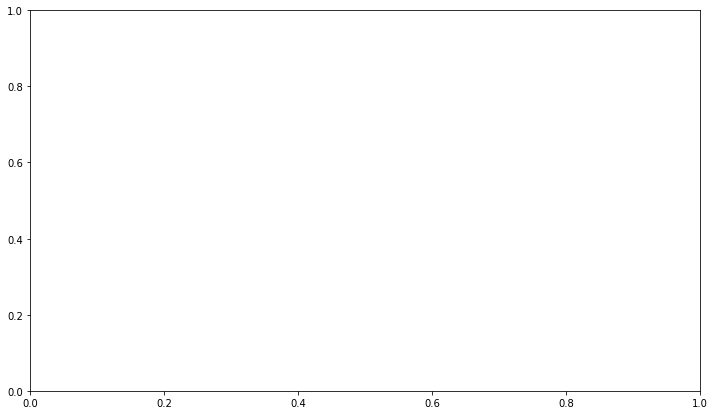

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(12,7))
#plt.figure(figsize=(12,7))
for name, group in ac_perf.groupby('year'):
    group.sort_values(['num_topics']).plot('num_topics', y='coherence', ax=ax, label=name)
    plt.xticks([20,30,40,50])
    plt.ylabel('coherence')

### Academic - Coherence - num_topics of largest Coherence

In [20]:
dict_ac_num_topics_largest_coherence = {}
for name, group in ac_perf.groupby('year'):
    dict_ac_num_topics_largest_coherence[name] = group.sort_values(['num_topics']).nlargest(1, 'coherence')['num_topics'].values[0]
dict_ac_num_topics_largest_coherence

{2008: 20,
 2009: 20,
 2010: 50,
 2011: 20,
 2012: 20,
 2013: 40,
 2014: 20,
 2015: 20,
 2016: 20,
 2017: 20}

### Academic - Perplexity - graph

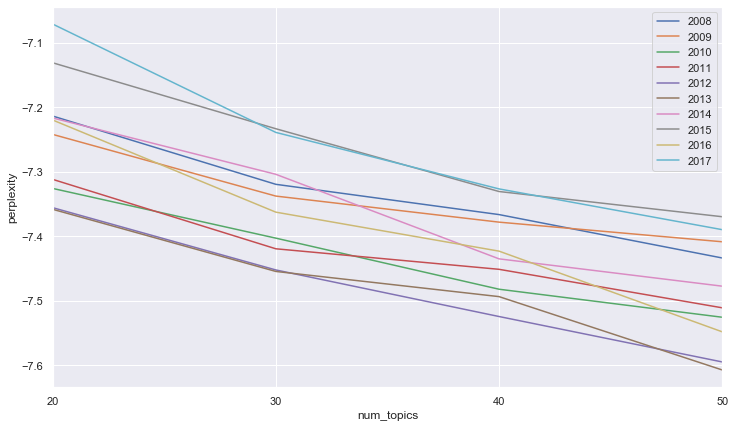

In [187]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(12,7))
for name, group in ac_perf.groupby('year'):
    group.sort_values(['num_topics']).plot('num_topics', y='perplexity', ax=ax, label=name)
    plt.xticks([20,30,40,50])
    plt.ylabel('perplexity')

### Academic - Perplexity - num_topics of largest Perplexity

In [18]:
dict_ac_num_topics_largest_perplexity = {}
for name, group in ac_perf.groupby('year'):

    dict_ac_num_topics_largest_perplexity[name] = group.sort_values(['num_topics']).nlargest(1, 'perplexity')['num_topics'].values[0]

dict_ac_num_topics_largest_perplexity

{2008: 20,
 2009: 20,
 2010: 20,
 2011: 20,
 2012: 20,
 2013: 20,
 2014: 20,
 2015: 20,
 2016: 20,
 2017: 20}

## NYT best number of topics
### NYT - Coherence graph

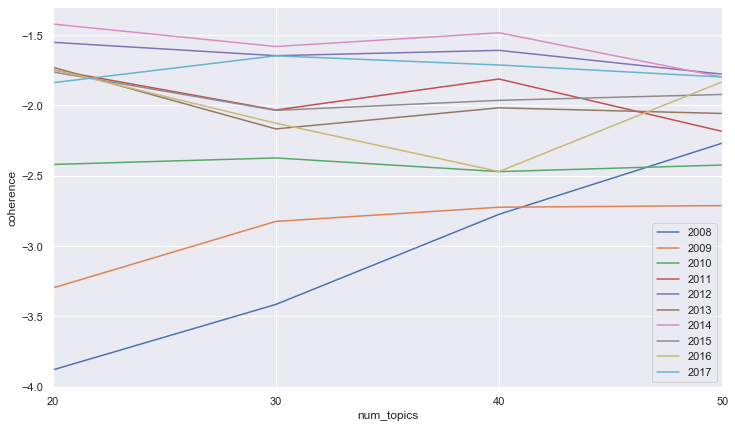

In [189]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(12,7))
for name, group in nyt_perf.groupby('year'):
    group.sort_values(['num_topics']).plot('num_topics', y='coherence', ax=ax, label=name)
    plt.xticks([20,30,40,50])
    plt.ylabel('coherence')

### NYT - Coherence - num_topics of largest Coherence

In [17]:
dict_nyt_num_topics_largest_coherence = {}
for name, group in nyt_perf.groupby('year'):
    dict_nyt_num_topics_largest_coherence[name] = group.sort_values(['num_topics']).nlargest(1, 'coherence')['num_topics'].values[0]
dict_nyt_num_topics_largest_coherence

{2008: 50,
 2009: 50,
 2010: 30,
 2011: 20,
 2012: 20,
 2013: 20,
 2014: 20,
 2015: 20,
 2016: 20,
 2017: 30}

### NYT - Perplexity - graph

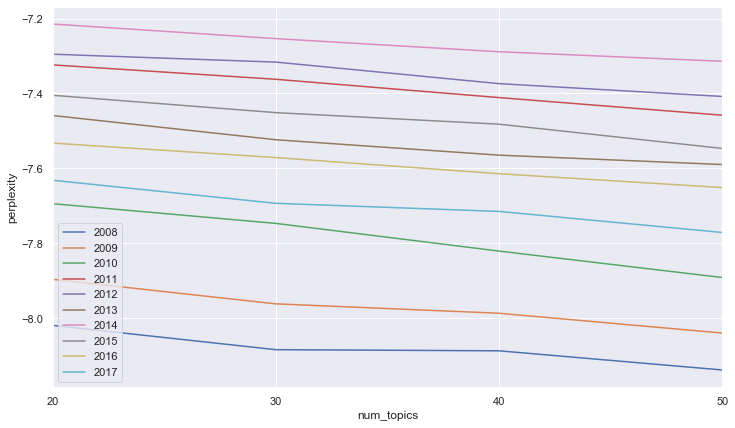

In [191]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(12,7))
for name, group in nyt_perf.groupby('year'):
    group.sort_values(['num_topics']).plot('num_topics', y='perplexity', ax=ax, label=name)
    plt.xticks([20,30,40,50])
    plt.ylabel('perplexity')

### NYT - num_topics of largest Perplexity

In [15]:
dict_nyt_num_topics_largest_perplexity = {}
for name, group in nyt_perf.groupby('year'):
    #group.sort_values(['num_topics']).plot('num_topics', y='perplexity', ax=ax, label=name)
    dict_nyt_num_topics_largest_perplexity[name] = group.sort_values(['num_topics']).nlargest(1, 'perplexity')['num_topics'].values[0]

dict_nyt_num_topics_largest_perplexity


{2008: 20,
 2009: 20,
 2010: 20,
 2011: 20,
 2012: 20,
 2013: 20,
 2014: 20,
 2015: 20,
 2016: 20,
 2017: 20}

# Conclution: for Academic, use:

In [21]:
dict_ac_num_topics_largest_coherence

{2008: 20,
 2009: 20,
 2010: 50,
 2011: 20,
 2012: 20,
 2013: 40,
 2014: 20,
 2015: 20,
 2016: 20,
 2017: 20}

# for NYT, use:

In [179]:
dict_nyt_num_topics_largest_coherence

{2008: 50,
 2009: 50,
 2010: 30,
 2011: 20,
 2012: 20,
 2013: 20,
 2014: 20,
 2015: 20,
 2016: 20,
 2017: 30}